<a href="https://colab.research.google.com/github/dimi-fn/Emotion-Recognition-in-Movie-Abstracts/blob/master/4a_Models_ML_Overviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries for data analysis and manipulation
import pandas as pd
import numpy as np

np.random.seed(42) # to make this notebook's output stable across runs

# For plotting figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Generating the version of a wide variety of packages/libraries used & working environment
#pd.__version__
#pd.show_versions(as_json=False)

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# `movies_final_3`

In [ ]:
downloaded = drive.CreateFile({'id':'15H_8jf2Yr7uGM1namIgxzn-LMnTnF4DE'}) 
downloaded.GetContentFile('movies_final_3.csv') 

movies_final_3 = pd.read_csv('movies_final_3.csv') 
movies_final_3.shape

(55877, 17)

## Data Exploration and Statistical Analysis

In [ ]:
movies_final_3.head()

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.2500,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",-0.4588,negative,5,War|Crime,PERSON|PERSON|ORG|PERSON|DATE|PERSON|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...,"{'neg': 0.168, 'neu': 0.791, 'pos': 0.041, 'co...",-0.7645,negative,6,Family|Relatives,PERSON|PERSON|NORP|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...","{'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'com...",0.8860,positive,1,Affairs|Mystery,PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
movies_final_3.isnull().sum()

# missing values are all dataset -minus 300 labelled

movieId                      0
tmdbId                       0
title                        0
genres                       0
overview                     0
Vader_score                  0
Vader_compound               0
Vader_polarity               0
NMF_topic                    0
NMF_topic_description        0
entities                     0
happiness                55577
sadness                  55577
anger                    55577
disgust                  55577
fear                     55577
surprise                 55577
dtype: int64

In [ ]:
movies_final_3.head(1)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.25,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print ("Number of unique movies: {}".format(movies_final_3.movieId.nunique()))

print ("Number of unique genres: {}".format(movies_final_3.genres.nunique()))

Number of unique movies: 55877
Number of unique genres: 1621


In [ ]:
movies_final_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55877 entries, 0 to 55876
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                55877 non-null  int64  
 1   tmdbId                 55877 non-null  float64
 2   title                  55877 non-null  object 
 3   genres                 55877 non-null  object 
 4   overview               55877 non-null  object 
 5   Vader_score            55877 non-null  object 
 6   Vader_compound         55877 non-null  float64
 7   Vader_polarity         55877 non-null  object 
 8   NMF_topic              55877 non-null  int64  
 9   NMF_topic_description  55877 non-null  object 
 10  entities               55877 non-null  object 
 11  happiness              300 non-null    float64
 12  sadness                300 non-null    float64
 13  anger                  300 non-null    float64
 14  disgust                300 non-null    float64
 15  fe

# Splitting the data between labelled and unlabelled regarding emotion

In [ ]:
# labelled dataframe
# 300 emotions to 300 movie overviews
# it should include 300 rows

data=[]
for row in movies_final_3.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) or (row.sadness ==0 or row.sadness==1) or (row.anger==0 or row.anger==1) or (row.disgust==0 or row.disgust==1) or (row.fear==0 or row.fear==1) or (row.surprise==0 and row.surprise==1):
    data.append([row.movieId, row.tmdbId, row.title, row.genres, row.overview, row.Vader_score, row.Vader_compound, row.Vader_polarity, row.NMF_topic,
                 row.NMF_topic_description, row.entities, row.happiness, row.sadness, row.anger, row.disgust, row.fear, row.surprise])

labelled_df = pd.DataFrame(data, columns=['movieId', 'tmdbId', "title", 'genres', "overview", "Vader_score", "Vader_compound",
                                          "Vader_polarity", "NMF_topic", "NMF_topic_description", "entities", 
                                          "happiness", "sadness", "anger", "disgust", "fear", "surprise"
                                          ])
labelled_df.shape

(300, 17)

In [ ]:
labelled_df.isnull().sum().any()

False

In [ ]:
# unlabelled dataframe
# it should include initial number of rows - 300 = 55877 - 300 = 55,577 rows

data=[]
for row in movies_final_3.itertuples(index=True, name='Pandas'):
  if not((row.happiness ==0 or row.happiness==1) or (row.sadness ==0 or row.sadness==1) or (row.anger==0 or row.anger==1) or (row.disgust==0 or row.disgust==1) or (row.fear==0 or row.fear==1) or (row.surprise==0 and row.surprise==1)):
    data.append([row.movieId, row.tmdbId, row.title, row.genres, row.overview, row.Vader_score, row.Vader_compound, row.Vader_polarity, row.NMF_topic,
                 row.NMF_topic_description, row.entities, row.happiness, row.sadness, row.anger, row.disgust, row.fear, row.surprise])
    

unlabelled_df = pd.DataFrame(data, columns=['movieId', 'tmdbId', "title", 'genres', "overview", "Vader_score", "Vader_compound",
                                          "Vader_polarity", "NMF_topic", "NMF_topic_description", "entities", 
                                          "happiness", "sadness", "anger", "disgust", "fear", "surprise"
                                          ])
unlabelled_df.shape



(55577, 17)

In [ ]:
unlabelled_df.isnull().sum()

movieId                      0
tmdbId                       0
title                        0
genres                       0
overview                     0
Vader_score                  0
Vader_compound               0
Vader_polarity               0
NMF_topic                    0
NMF_topic_description        0
entities                     0
happiness                55577
sadness                  55577
anger                    55577
disgust                  55577
fear                     55577
surprise                 55577
dtype: int64

## `labelled_df`

Data Exploration and Statistical Analysis

In [ ]:
labelled_df.shape

(300, 17)

In [ ]:
labelled_df.head(1)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON,1.0,0.0,0.0,0.0,0.0,1.0


> We know in advance the the unique number of genres is 12, since the emotion labelling took place on 12 genres (from the top genre list of the dataset).

In [ ]:
print ("Number of unique movies: {}".format(labelled_df.movieId.nunique()))

print ("Number of unique genres: {}".format(labelled_df.genres.nunique()))

Number of unique movies: 300
Number of unique genres: 12


In [ ]:
labelled_df.describe()

,movieId,tmdbId,Vader_compound,NMF_topic,happiness,sadness,anger,disgust,fear,surprise
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,13309.990000,57695.770000,-0.031751,2.363333,0.226667,0.263333,0.350000,0.306667,0.700000,0.566667
std,33602.332169,90186.881273,0.643688,2.172646,0.419375,0.441178,0.477767,0.461880,0.459023,0.496364
min,5.000000,5.000000,-0.981400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,370.500000,12105.750000,-0.690800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1716.500000,27473.500000,0.051600,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,4078.750000,47580.000000,0.542300,4.250000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,145470.000000,581579.000000,0.984800,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                300 non-null    int64  
 1   tmdbId                 300 non-null    float64
 2   title                  300 non-null    object 
 3   genres                 300 non-null    object 
 4   overview               300 non-null    object 
 5   Vader_score            300 non-null    object 
 6   Vader_compound         300 non-null    float64
 7   Vader_polarity         300 non-null    object 
 8   NMF_topic              300 non-null    int64  
 9   NMF_topic_description  300 non-null    object 
 10  entities               300 non-null    object 
 11  happiness              300 non-null    float64
 12  sadness                300 non-null    float64
 13  anger                  300 non-null    float64
 14  disgust                300 non-null    float64
 15  fear  

In [ ]:
labelled_df.isnull().sum().any()

False

In [ ]:
labelled_df.happiness = labelled_df.happiness.astype(int)

labelled_df.sadness = labelled_df.sadness.astype(int)

labelled_df.anger = labelled_df.anger.astype(int)

labelled_df.disgust = labelled_df.disgust.astype(int)

labelled_df.fear = labelled_df.fear.astype(int)

labelled_df.surprise = labelled_df.surprise.astype(int)

In [ ]:
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                300 non-null    int64  
 1   tmdbId                 300 non-null    float64
 2   title                  300 non-null    object 
 3   genres                 300 non-null    object 
 4   overview               300 non-null    object 
 5   Vader_score            300 non-null    object 
 6   Vader_compound         300 non-null    float64
 7   Vader_polarity         300 non-null    object 
 8   NMF_topic              300 non-null    int64  
 9   NMF_topic_description  300 non-null    object 
 10  entities               300 non-null    object 
 11  happiness              300 non-null    int64  
 12  sadness                300 non-null    int64  
 13  anger                  300 non-null    int64  
 14  disgust                300 non-null    int64  
 15  fear  

In [ ]:
# a sample of movie overviews before data preprocessing
labelled_df.overview[:6]

0    Just when George Banks has recovered from his ...
1    When a man's daughter is suddenly taken during...
2    An epic look at President Richard M. Nixon—a m...
3    It's Ted the Bellhop's first night on the job....
4    Summoned from an ashram in Tibet, Ace finds hi...
5    The evil Iago pretends to be friend of Othello...
Name: overview, dtype: object

### Visualisation

The distribution of the number of words in comment texts.

> Most of the overviews' text length are within 500 characters, with some outliers around 1000 characters long.

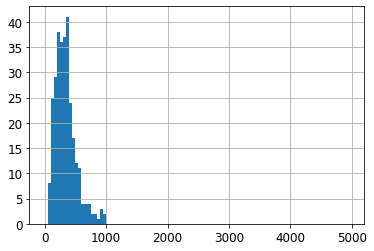

In [ ]:
lens = labelled_df.overview.str.len()
lens.hist(bins = np.arange(0,5000,50))

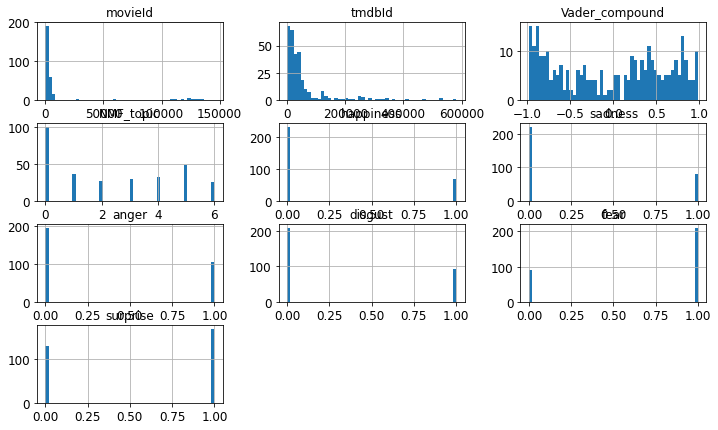

In [ ]:
# Plot histograms 
%matplotlib inline
import matplotlib.pyplot as plt

labelled_df.hist(bins=50, figsize=(12,7))
plt.show()

>Heatmap of the dataset:

>>The darker the colour(closest to 1), the stronger is the correlation. Here we notice that popularity has strong correlation with energy(nrgy), danceability(dnce), loudness(dB) (and duration, but probably not important):


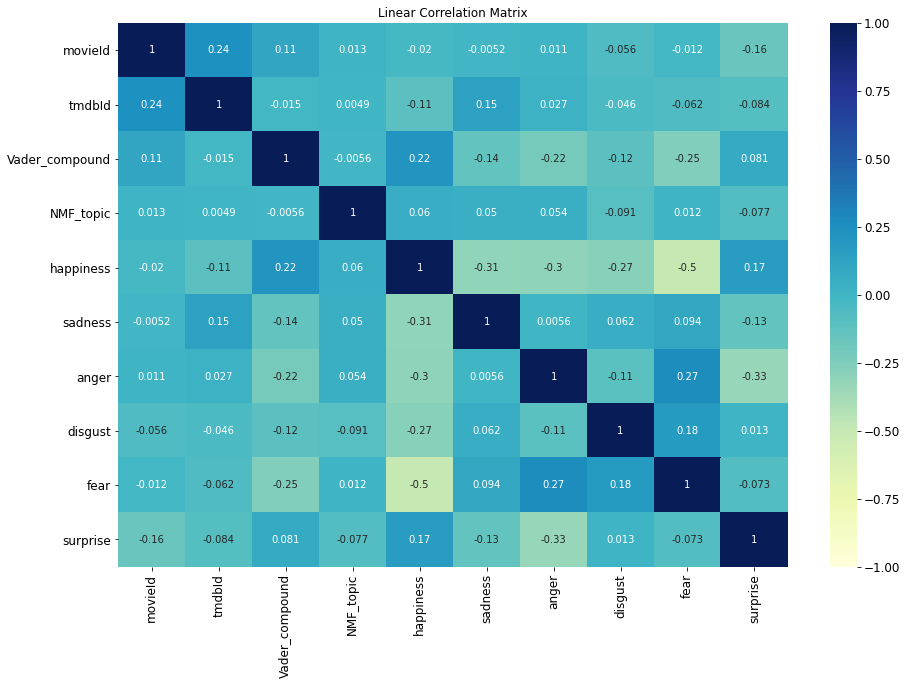

In [ ]:
# Plot linear correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(labelled_df.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('Linear Correlation Matrix')
plt.show()

In [ ]:
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                300 non-null    int64  
 1   tmdbId                 300 non-null    float64
 2   title                  300 non-null    object 
 3   genres                 300 non-null    object 
 4   overview               300 non-null    object 
 5   Vader_score            300 non-null    object 
 6   Vader_compound         300 non-null    float64
 7   Vader_polarity         300 non-null    object 
 8   NMF_topic              300 non-null    int64  
 9   NMF_topic_description  300 non-null    object 
 10  entities               300 non-null    object 
 11  happiness              300 non-null    int64  
 12  sadness                300 non-null    int64  
 13  anger                  300 non-null    int64  
 14  disgust                300 non-null    int64  
 15  fear  

#### Wordclouds before Data Preprocessing - labelled_df



#####  Emotions - labelled_df

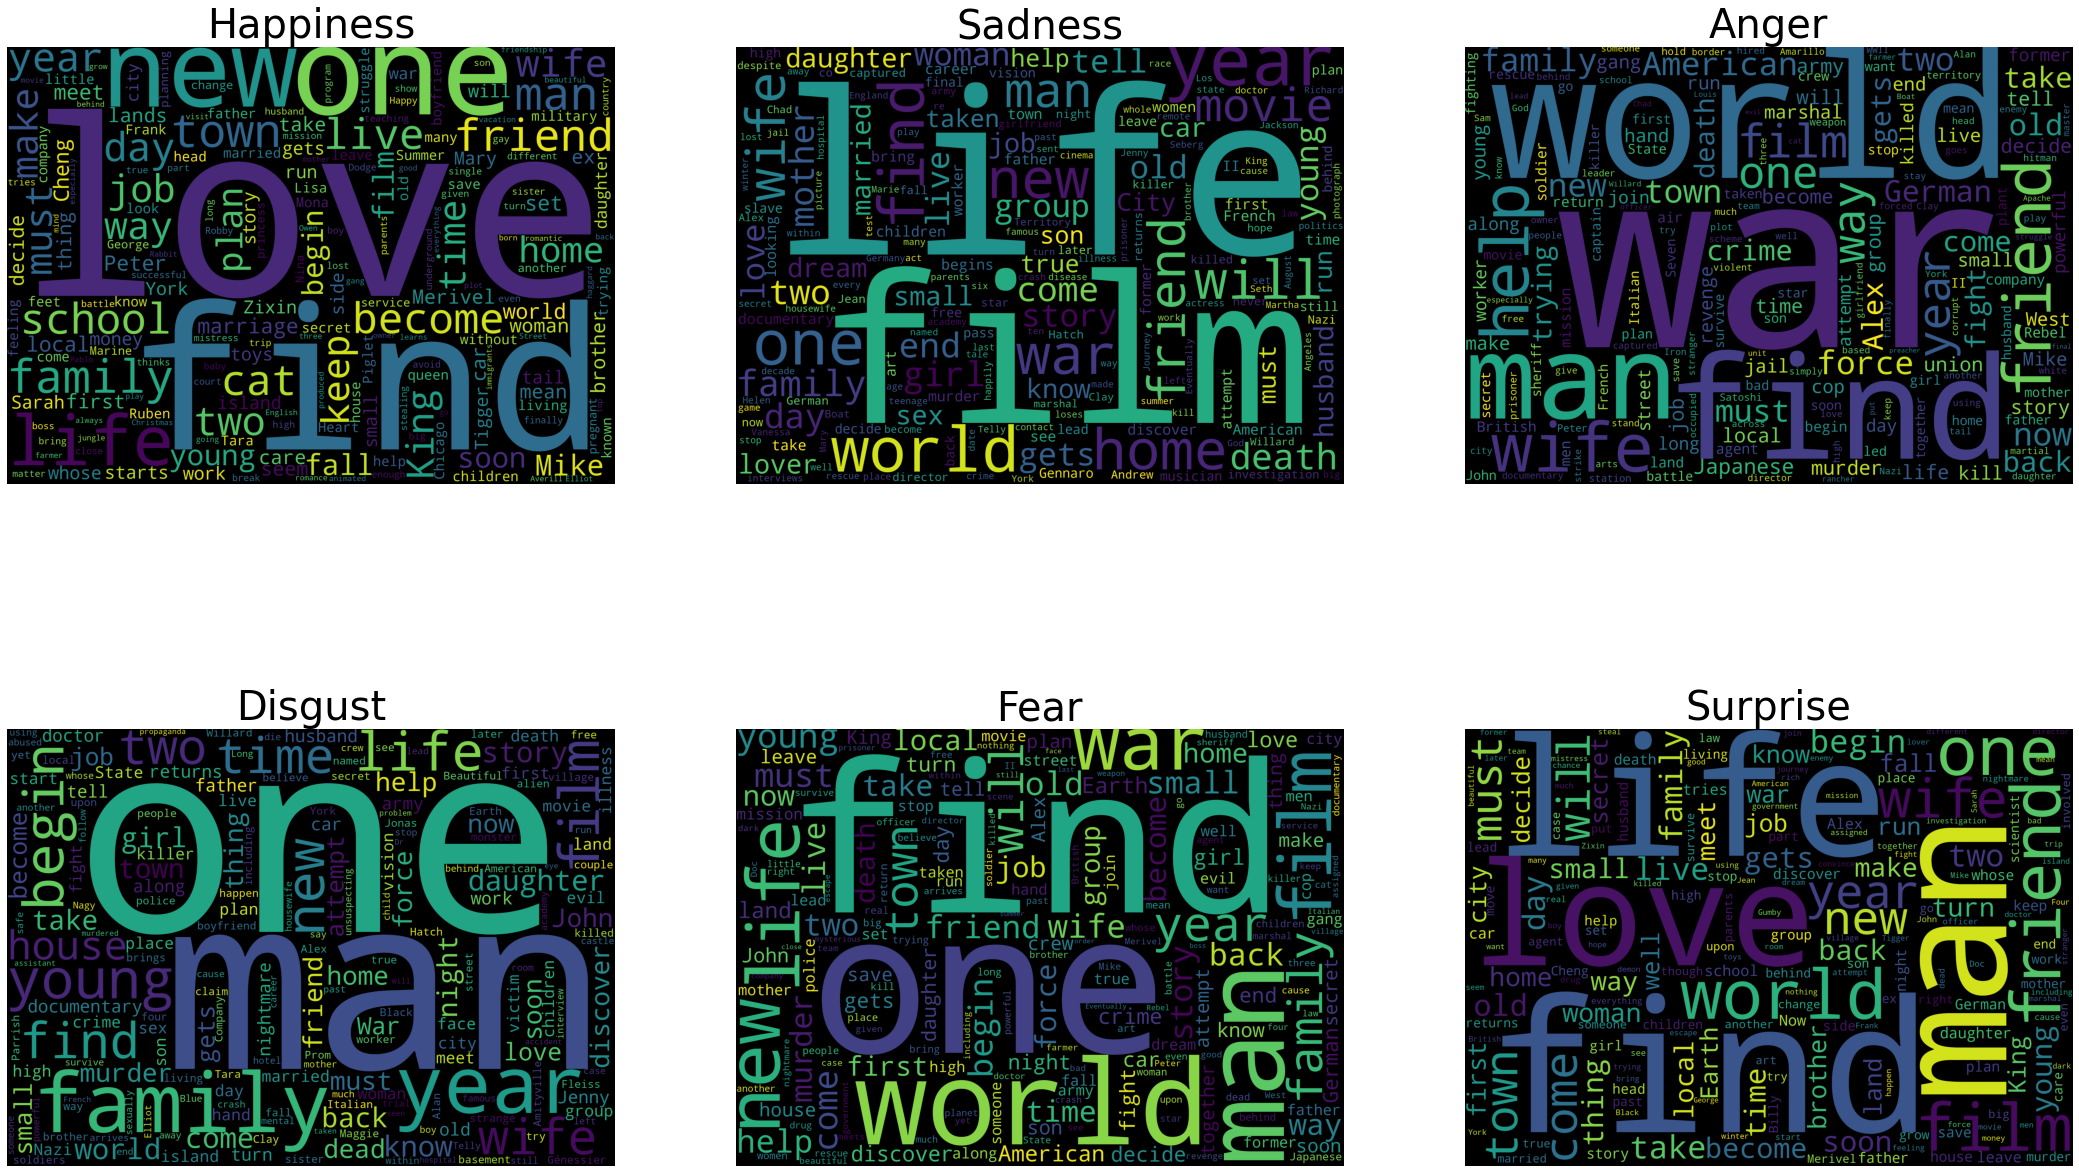

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(37,23))

# happiness
subset = labelled_df[labelled_df.happiness==1]
overviews = subset.overview.values
cloud_happiness = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Happiness",fontsize=40)
plt.imshow(cloud_happiness)


# sadness
subset = labelled_df[labelled_df.sadness==1]
overviews = subset.overview.values
cloud_sadness = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Sadness",fontsize=40)
plt.imshow(cloud_sadness)


# anger
subset = labelled_df[labelled_df.anger==1]
overviews = subset.overview.values
cloud_anger = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Anger",fontsize=40)
plt.imshow(cloud_anger)


# disgust
subset = labelled_df[labelled_df.disgust==1]
overviews = subset.overview.values
cloud_disgust = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Disgust",fontsize=40)
plt.imshow(cloud_disgust)


# fear
subset = labelled_df[labelled_df.fear==1]
overviews = subset.overview.values
cloud_fear = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Fear",fontsize=40)
plt.imshow(cloud_fear)


# surprise
subset = labelled_df[labelled_df.surprise==1]
overviews = subset.overview.values
cloud_surprise = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Surprise",fontsize=40)
plt.imshow(cloud_surprise)

plt.show()

##### General - labelled_df

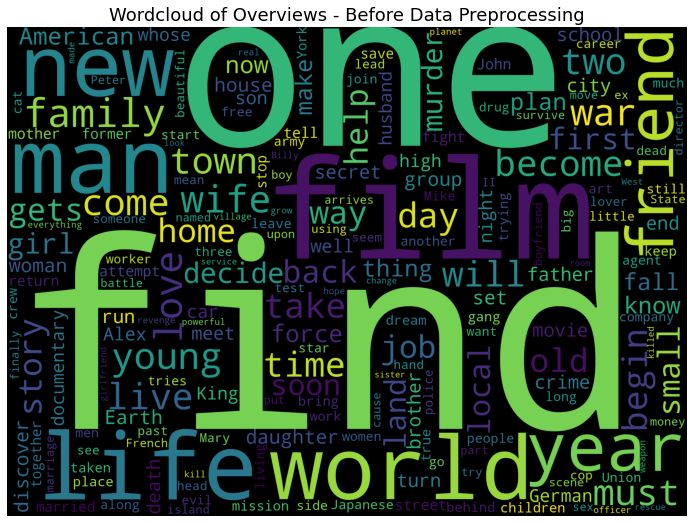

In [ ]:
plt.figure(figsize=(15,9))
# clean
subset = labelled_df
text = subset.overview.values
cloud_general = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Wordcloud of Overviews - Before Data Preprocessing",fontsize=18)
plt.imshow(cloud_general)

##### General - movies_final_3

In [ ]:
# in comments because it requires a lot of time 
'''
plt.figure(figsize=(15,9))
# clean
subset = movies_final_3
text = subset.overview.values
cloud_general = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Wordcloud of Overviews - Before Data Preprocessing",fontsize=18)
plt.imshow(cloud_general)
'''

'\nplt.figure(figsize=(15,9))\n# clean\nsubset = movies_final_3\ntext = subset.overview.values\ncloud_general = WordCloud(\n                          stopwords=STOPWORDS,\n                          background_color=\'black\',\n                          collocations=False,\n                          width=2500,\n                          height=1800\n                         ).generate(" ".join(text))\nplt.axis(\'off\')\nplt.title("Wordcloud of Overviews - Before Data Preprocessing",fontsize=18)\nplt.imshow(cloud_general)\n'

# Correlation Matrix in labelled_df


In [ ]:
correlation_matrix= labelled_df.corr()
print("Correlation matrix for happiness: \n\n{}".format(correlation_matrix["happiness"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for sadness: \n\n{}".format(correlation_matrix["sadness"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for anger: \n\n{}".format(correlation_matrix["anger"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for disgust: \n\n{}".format(correlation_matrix["disgust"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for fear: \n\n{}".format(correlation_matrix["fear"].sort_values(ascending=False)))
print("=====================================================")
print("Correlation matrix for surprise: \n\n{}".format(correlation_matrix["surprise"].sort_values(ascending=False)))

Correlation matrix for happiness: 

happiness         1.000000
Vader_compound    0.222108
surprise          0.168165
NMF_topic         0.059806
movieId          -0.020300
tmdbId           -0.111893
disgust          -0.273727
anger            -0.297119
sadness          -0.305613
fear             -0.496887
Name: happiness, dtype: float64
Correlation matrix for sadness: 

sadness           1.000000
tmdbId            0.145288
fear              0.094136
disgust           0.061931
NMF_topic         0.049884
anger             0.005554
movieId          -0.005215
surprise         -0.133891
Vader_compound   -0.136663
happiness        -0.305613
Name: sadness, dtype: float64
Correlation matrix for anger: 

anger             1.000000
fear              0.266880
NMF_topic         0.054291
tmdbId            0.026631
movieId           0.010547
sadness           0.005554
disgust          -0.109123
Vader_compound   -0.217280
happiness        -0.297119
surprise         -0.331422
Name: anger, dtype: float6

# Models - Overviews

Building models for the prediction of emotions with features being only the movie overviews

# References

>[Susan Li](https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5) & [Susan Li](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Multi%20label%20text%20classification.ipynb
) &  [Susan Li](https://towardsdatascience.com/columntransformer-meets-natural-language-processing-da1f116dd69f
)  &
[Susan Li](https://github.com/susanli2016/NLP-with-Python/blob/master/ColumnTransformer%20Meets%20NLP.ipynb
) 



> [Kartik Nooney](https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff) & [Kartik Nooney](https://github.com/nkartik94/Multi-Label-Text-Classification/blob/master/Mark_6.ipynb)

> [scikit-multilearn](http://scikit.ml/api/skmultilearn.html#classifiers-and-tools)

> [Shubhan Jain](https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/)

> [Avishek Nag](https://medium.com/towards-artificial-intelligence/understanding-multi-label-classification-model-and-accuracy-metrics-1b2a8e2648ca)

> [Allison Honold
](https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260) & [Allison Honold
](https://github.com/allisonhonold/column_transformer_ferry_wait_blog)

> [Amber Teng](https://towardsdatascience.com/dealing-with-multiclass-data-78a1a27c5dcc) & [Amber Teng](https://github.com/angelaaaateng/Projects/blob/master/Covertype_Prediction/Scripts/Tree-Based%20and%20Bagging%20Methods.ipynb) & [Amber Teng](https://github.com/angelaaaateng/Covertype_Analysis)

> [Allison Honold
](https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260) & [Allison Honold
](https://github.com/allisonhonold/column_transformer_ferry_wait_blog)

> [Mohammed Terry-Jack
](https://medium.com/@b.terryjack/tips-and-tricks-for-multi-class-classification-c184ae1c8ffc)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

### Data Cleaning & Preprocessing

Cleaning Data

Data preprocessing with regard to movie overviews:

* convert to lower-case
* removal of html tags, punctuation, non-alphabetic characters
* removal of stopwords, and adding some few other words in the stopwords list
* fixing some informal text in the vocabulary, e.g. what's -> what is
* stemming (transform/convert words with roughly the same semantics to one standard form. For example, for amusing, amusement, and amused, the stem would be amus.)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

"""
if not sys.warnoptions:
    warnings.simplefilter("ignore")
"""

'\nif not sys.warnoptions:\n    warnings.simplefilter("ignore")\n'

In [ ]:
def clean_text(text):
    text = text.lower() 
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

def clean_html(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def clean_punctuations(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keep_alpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

# stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def remove_stopwords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

# stemming 
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


# apply in labelled dataframe
labelled_df["overview"]= labelled_df["overview"].apply(clean_text)

labelled_df["overview"]= labelled_df["overview"].apply(clean_html)

labelled_df["overview"]= labelled_df["overview"].apply(clean_punctuations)

labelled_df["overview"]= labelled_df["overview"].apply(keep_alpha)

labelled_df["overview"]= labelled_df["overview"].apply(remove_stopwords)

labelled_df["overview"]= labelled_df["overview"].apply(stemming)




labelled_df["title"]= labelled_df["title"].apply(clean_text)

labelled_df["title"]= labelled_df["title"].apply(clean_html)

labelled_df["title"]= labelled_df["title"].apply(clean_punctuations)

labelled_df["title"]= labelled_df["title"].apply(keep_alpha)

labelled_df["title"]= labelled_df["title"].apply(remove_stopwords)

labelled_df["title"]= labelled_df["title"].apply(stemming)



labelled_df["genres"]= labelled_df["genres"].apply(clean_text)

labelled_df["genres"]= labelled_df["genres"].apply(clean_html)

labelled_df["genres"]= labelled_df["genres"].apply(clean_punctuations)

labelled_df["genres"]= labelled_df["genres"].apply(keep_alpha)

labelled_df["genres"]= labelled_df["genres"].apply(remove_stopwords)

labelled_df["genres"]= labelled_df["genres"].apply(stemming)


labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(clean_text)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(clean_html)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(clean_punctuations)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(keep_alpha)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(remove_stopwords)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(stemming)




labelled_df["entities"]= labelled_df["entities"].apply(clean_text)

labelled_df["entities"]= labelled_df["entities"].apply(clean_html)

labelled_df["entities"]= labelled_df["entities"].apply(clean_punctuations)

labelled_df["entities"]= labelled_df["entities"].apply(keep_alpha)

labelled_df["entities"]= labelled_df["entities"].apply(remove_stopwords)

labelled_df["entities"]= labelled_df["entities"].apply(stemming)


'''
# apply in all dataframe
movies_final_3["overview"]= movies_final_3["overview"].apply(clean_text)

movies_final_3["overview"]= movies_final_3["overview"].apply(clean_html)

movies_final_3["overview"]= movies_final_3["overview"].apply(clean_punctuations)

movies_final_3["overview"]= movies_final_3["overview"].apply(keep_alpha)

movies_final_3["overview"]= movies_final_3["overview"].apply(remove_stopwords)

movies_final_3["overview"]= movies_final_3["overview"].apply(stemming)

'''

'''
# apply in unlabelled df
unlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_text)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_html)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_punctuations)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(keep_alpha)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(remove_stopwords)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(stemming)

'''


'\n# apply in unlabelled df\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_text)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_html)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_punctuations)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(keep_alpha)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(remove_stopwords)\n\nunlabelled_df["overview"]= unlabelled_df["overview"].apply(stemming)\n\n'

In [ ]:
# sample of how now the cleaned overviews look like in the labelled dataframe
labelled_df["overview"][:6]

0    georg bank recov daughter wed receiv news preg...
1    man daughter sudden taken championship hockey ...
2    epic look presid richard nixon man carri fate ...
3    ted bellhop first night job hotel unusu guest ...
4    summon ashram tibet ace find peril journey jun...
5    evil iago pretend friend othello order manipul...
Name: overview, dtype: object

In [ ]:
'''
# sample of how now the cleaned overviews look like in the whole dataframe
movies_final_3["overview"][:6]
'''

'\n# sample of how now the cleaned overviews look like in the whole dataframe\nmovies_final_3["overview"][:6]\n'

## Feature Engineering

Fixing the feature "Vader_score" as it appears as a json-dictionary object. Also converting the types of other features in a right way for the subsequent encoding of them into numerical values

### Fixing "Vader_Score"

In [ ]:
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                300 non-null    int64  
 1   tmdbId                 300 non-null    float64
 2   title                  300 non-null    object 
 3   genres                 300 non-null    object 
 4   overview               300 non-null    object 
 5   Vader_score            300 non-null    object 
 6   Vader_compound         300 non-null    float64
 7   Vader_polarity         300 non-null    object 
 8   NMF_topic              300 non-null    int64  
 9   NMF_topic_description  300 non-null    object 
 10  entities               300 non-null    object 
 11  happiness              300 non-null    int64  
 12  sadness                300 non-null    int64  
 13  anger                  300 non-null    int64  
 14  disgust                300 non-null    int64  
 15  fear  

In [ ]:
# fixing attribute Vader_score which is like a dictionary of values

labelled_df.Vader_score[:2]

0    {'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...
1    {'neg': 0.099, 'neu': 0.759, 'pos': 0.143, 'co...
Name: Vader_score, dtype: object

In [ ]:
from pandas.api.types import is_dict_like
is_dict_like(labelled_df.Vader_score)

True

#### Fixing it in `labelled_df`

In [ ]:
# converting the Vader_score attribute into an object type
labelled_df["Vader_score"] = labelled_df["Vader_score"].astype("object")

# converting the below categorical attributes into type "category"
# they will then be label encoded and one_hot_encoded
labelled_df["title"] = labelled_df["title"].astype("category")

labelled_df["genres"] = labelled_df["genres"].astype("category")

labelled_df["Vader_polarity"] = labelled_df["Vader_polarity"].astype("category")

labelled_df["NMF_topic_description"] = labelled_df["NMF_topic_description"].astype("category")

labelled_df["entities"] = labelled_df["entities"].astype("category")


labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   movieId                300 non-null    int64   
 1   tmdbId                 300 non-null    float64 
 2   title                  300 non-null    category
 3   genres                 300 non-null    category
 4   overview               300 non-null    object  
 5   Vader_score            300 non-null    object  
 6   Vader_compound         300 non-null    float64 
 7   Vader_polarity         300 non-null    category
 8   NMF_topic              300 non-null    int64   
 9   NMF_topic_description  300 non-null    category
 10  entities               300 non-null    category
 11  happiness              300 non-null    int64   
 12  sadness                300 non-null    int64   
 13  anger                  300 non-null    int64   
 14  disgust                300 non-null    int

In [ ]:
labelled_df["Vader_score"] = labelled_df["Vader_score"].apply(lambda x: dict(eval(x)))

In [ ]:
df_temp= labelled_df["Vader_score"].apply(pd.Series)
df_temp[:3]

,neg,neu,pos,compound
0,0.000,0.944,0.056,0.5023
1,0.099,0.759,0.143,0.4404
2,0.229,0.771,0.000,-0.8658


In [ ]:
result= pd.concat([df_temp, labelled_df], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)
result.shape
# 2 new columns added (2 columns removed, 4 were added)
# "Vader_score" is not needed anymore since its values are now displayed as new columns
# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score
# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"
# (300, 19)

(300, 19)

In [ ]:
labelled_df=result
labelled_df.shape

(300, 19)

In [ ]:
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   neg                    300 non-null    float64 
 1   neu                    300 non-null    float64 
 2   pos                    300 non-null    float64 
 3   compound               300 non-null    float64 
 4   movieId                300 non-null    int64   
 5   tmdbId                 300 non-null    float64 
 6   title                  300 non-null    category
 7   genres                 300 non-null    category
 8   overview               300 non-null    object  
 9   Vader_polarity         300 non-null    category
 10  NMF_topic              300 non-null    int64   
 11  NMF_topic_description  300 non-null    category
 12  entities               300 non-null    category
 13  happiness              300 non-null    int64   
 14  sadness                300 non-null    int

In [ ]:
labelled_df.head(1)

,neg,neu,pos,compound,movieId,tmdbId,title,genres,overview,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,0.0,0.944,0.056,0.5023,5,11862.0,father bride part ii,comedi,georg bank recov daughter wed receiv news preg...,positive,0,battl offenc,person person person person,1,0,0,0,0,1


In [ ]:
# changing the order of columns

labelled_df =  labelled_df[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]
labelled_df.shape

(300, 19)

In [ ]:
labelled_df.head(1)

,movieId,tmdbId,title,genres,overview,Vader_polarity,compound,neg,neu,pos,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,5,11862.0,father bride part ii,comedi,georg bank recov daughter wed receiv news preg...,positive,0.5023,0.0,0.944,0.056,0,battl offenc,person person person person,1,0,0,0,0,1


#### Fixing it in the whole dataset

> Applying the same changes into the whole df (movies_final_3) and the unlabelled df (unlabelled_df), which is the result of movies_final_3 minus the labelled_df

In [ ]:
#movies_final_3.shape

In [ ]:
'''
# converting the Vader_score attribute into an object type
movies_final_3["Vader_score"] = movies_final_3["Vader_score"].astype("object")

# converting the below categorical attributes into type "category"
# they will then be label encoded and one_hot_encoded
movies_final_3["title"] = movies_final_3["title"].astype("category")

movies_final_3["genres"] = movies_final_3["genres"].astype("category")

movies_final_3["Vader_polarity"] = movies_final_3["Vader_polarity"].astype("category")

movies_final_3["NMF_topic_description"] = movies_final_3["NMF_topic_description"].astype("category")

movies_final_3["entities"] = movies_final_3["entities"].astype("category")


movies_final_3.info()

'''

'\n# converting the Vader_score attribute into an object type\nmovies_final_3["Vader_score"] = movies_final_3["Vader_score"].astype("object")\n\n# converting the below categorical attributes into type "category"\n# they will then be label encoded and one_hot_encoded\nmovies_final_3["title"] = movies_final_3["title"].astype("category")\n\nmovies_final_3["genres"] = movies_final_3["genres"].astype("category")\n\nmovies_final_3["Vader_polarity"] = movies_final_3["Vader_polarity"].astype("category")\n\nmovies_final_3["NMF_topic_description"] = movies_final_3["NMF_topic_description"].astype("category")\n\nmovies_final_3["entities"] = movies_final_3["entities"].astype("category")\n\n\nmovies_final_3.info()\n\n'

In [ ]:
'''
from pandas.api.types import is_dict_like
is_dict_like(movies_final_3.Vader_score)

'''

'\nfrom pandas.api.types import is_dict_like\nis_dict_like(movies_final_3.Vader_score)\n\n'

In [ ]:
#movies_final_3["Vader_score"] = movies_final_3["Vader_score"].apply(lambda x: dict(eval(x)))

In [ ]:
'''
df_temp= movies_final_3["Vader_score"].apply(pd.Series)
df_temp[:3]
'''

'\ndf_temp= movies_final_3["Vader_score"].apply(pd.Series)\ndf_temp[:3]\n'

In [ ]:
'''

result= pd.concat([df_temp, movies_final_3], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)
result.shape
# 2 new columns added (2 columns removed, 4 were added)
# "Vader_score" is not needed anymore since its values are now displayed as new columns
# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score
# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"
# (55877, 19)

'''

'\n\nresult= pd.concat([df_temp, movies_final_3], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)\nresult.shape\n# 2 new columns added (2 columns removed, 4 were added)\n# "Vader_score" is not needed anymore since its values are now displayed as new columns\n# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score\n# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"\n# (55877, 19)\n\n'

In [ ]:
'''
movies_final_3=result
movies_final_3.shape

'''

'\nmovies_final_3=result\nmovies_final_3.shape\n\n'

In [ ]:
'''

# changing the order of columns

movies_final_3 =  movies_final_3[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]
movies_final_3.shape

'''

'\n\n# changing the order of columns\n\nmovies_final_3 =  movies_final_3[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]\nmovies_final_3.shape\n\n'

In [ ]:
#movies_final_3.head(1)

#### Fixing it in unlabelled_df

In [ ]:
#unlabelled_df.shape

In [ ]:
'''
# converting the Vader_score attribute into an object type
unlabelled_df["Vader_score"] = unlabelled_df["Vader_score"].astype("object")

# converting the below categorical attributes into type "category"
# they will then be label encoded and one_hot_encoded
unlabelled_df["title"] = unlabelled_df["title"].astype("category")

unlabelled_df["genres"] = unlabelled_df["genres"].astype("category")

unlabelled_df["Vader_polarity"] = unlabelled_df["Vader_polarity"].astype("category")

unlabelled_df["NMF_topic_description"] = unlabelled_df["NMF_topic_description"].astype("category")

unlabelled_df["entities"] = unlabelled_df["entities"].astype("category")


unlabelled_df.info()
'''

'\n# converting the Vader_score attribute into an object type\nunlabelled_df["Vader_score"] = unlabelled_df["Vader_score"].astype("object")\n\n# converting the below categorical attributes into type "category"\n# they will then be label encoded and one_hot_encoded\nunlabelled_df["title"] = unlabelled_df["title"].astype("category")\n\nunlabelled_df["genres"] = unlabelled_df["genres"].astype("category")\n\nunlabelled_df["Vader_polarity"] = unlabelled_df["Vader_polarity"].astype("category")\n\nunlabelled_df["NMF_topic_description"] = unlabelled_df["NMF_topic_description"].astype("category")\n\nunlabelled_df["entities"] = unlabelled_df["entities"].astype("category")\n\n\nunlabelled_df.info()\n'

In [ ]:
'''
from pandas.api.types import is_dict_like
is_dict_like(unlabelled_df.Vader_score)
'''

'\nfrom pandas.api.types import is_dict_like\nis_dict_like(unlabelled_df.Vader_score)\n'

In [ ]:
#unlabelled_df["Vader_score"] = unlabelled_df["Vader_score"].apply(lambda x: dict(eval(x)))

In [ ]:
'''
df_temp= unlabelled_df["Vader_score"].apply(pd.Series)
df_temp[:3]
'''

'\ndf_temp= unlabelled_df["Vader_score"].apply(pd.Series)\ndf_temp[:3]\n'

In [ ]:
'''
result= pd.concat([df_temp, unlabelled_df], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)
result.shape
# 2 new columns added (2 columns removed, 4 were added)
# "Vader_score" is not needed anymore since its values are now displayed as new columns
# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score
# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"
# (55,577, 19)
'''

'\nresult= pd.concat([df_temp, unlabelled_df], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)\nresult.shape\n# 2 new columns added (2 columns removed, 4 were added)\n# "Vader_score" is not needed anymore since its values are now displayed as new columns\n# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score\n# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"\n# (55,577, 19)\n'

In [ ]:
'''
unlabelled_df=result
unlabelled_df.shape
'''

'\nunlabelled_df=result\nunlabelled_df.shape\n'

In [ ]:
'''
# changing the order of columns

unlabelled_df =  movies_final_3[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]
unlabelled_df.shape
'''

'\n# changing the order of columns\n\nunlabelled_df =  movies_final_3[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]\nunlabelled_df.shape\n'

In [ ]:
#unlabelled_df.head(1)

## Split into train-validation-test data

* train data: 240/300 (80%)
* validation data: 30/300 (10%)
* test data: 30/300 (10%)

In [ ]:
emotions = ["happiness", "sadness", "anger", "disgust", "fear", "surprise"]

from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test= train_test_split(labelled_df[["overview"]], labelled_df[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]], test_size=0.1, random_state=42)

In [ ]:
print("Shape of x_train_val is: {}".format(x_train_val.shape))
print("Shape of x_test is: {}".format(x_test.shape))
print("Shape of y_train_val is: {}".format(y_train_val.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train_val is: (270, 1)
Shape of x_test is: (30, 1)
Shape of y_train_val is: (270, 6)
Shape of y_test is: (30, 6)


In [ ]:
x_train, x_val, y_train, y_val= train_test_split(x_train_val, y_train_val, test_size=30, random_state=42)

In [ ]:
print("Shape of x_train is: {}".format(x_train.shape))
print("Shape of x_val is: {}".format(x_val.shape))
print("Shape of x_test is: {}".format(x_test.shape))
print("==============================================")
print("Shape of y_train is: {}".format(y_train.shape))
print("Shape of y_val is: {}".format(y_val.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train is: (240, 1)
Shape of x_val is: (30, 1)
Shape of x_test is: (30, 1)
Shape of y_train is: (240, 6)
Shape of y_val is: (30, 6)
Shape of y_test is: (30, 6)


## TFID

> tfid creates a document term matrix 

### TFID fit_transform train dataset

 Applying tfid vectorizer in the text data (movie overviews)

 These tranformations will be fit_tranformed in the training set, and then tranformed in validation and test set for predictions. These tranformations lead to sparse matrices which classifier cannot handle, therefore they will later be converted to array elements


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word',stop_words="english", ngram_range=(1,3), norm='l2')

In [ ]:
# fit_transform the train set
x_train_transformed = tfid_vectorizer.fit_transform(list(x_train["overview"]))
x_train_transformed

<240x17015 sparse matrix of type '<class 'numpy.float64'>'
	with 20754 stored elements in Compressed Sparse Row format>

In [ ]:
x_train_final = x_train_transformed.toarray()
x_train_final

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### TFID transform validation & test dataset

Transform the tfid vectorizer transformations into the validation and test data. This should be done when predictions will be made correspondingly

In [ ]:
# transform the validation set
x_val_transformed= tfid_vectorizer.transform(list(x_val["overview"]))
x_val_transformed

<30x17015 sparse matrix of type '<class 'numpy.float64'>'
	with 560 stored elements in Compressed Sparse Row format>

In [ ]:
x_val_final = x_val_transformed.toarray()
x_val_final

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# transform test set
x_test_transformed = tfid_vectorizer.transform(list(x_test["overview"]))
x_test_transformed

<30x17015 sparse matrix of type '<class 'numpy.float64'>'
	with 651 stored elements in Compressed Sparse Row format>

In [ ]:
x_test_final = x_test_transformed.toarray()
x_test_final

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print("Shape of x_train_transformed is: {}".format(x_train_transformed.shape))
print("Shape of x_val_transformed is: {}".format(x_val_transformed.shape))
print("Shape of x_test_transformed is: {}".format(x_test_transformed.shape))
print("==============================================")
print("Shape of y_train is: {}".format(y_train.shape))
print("Shape of y_val is: {}".format(y_val.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train_transformed is: (240, 17015)
Shape of x_val_transformed is: (30, 17015)
Shape of x_test_transformed is: (30, 17015)
Shape of y_train is: (240, 6)
Shape of y_val is: (30, 6)
Shape of y_test is: (30, 6)


## Dictionary of Scores
Creating a dictionary of scores in order later to create comparative graphs

In [ ]:
# keeping track of models
models_overviews= []

# Mean subset accuracy score
mean_sub_acc_overviews= []

# mean cross validation score
mean_cross_val_overviews = []

# Average micro f1 score
micro_f1_overviews= []

## Classifiers & Models

The prediction of emotions falls into a multi-label classification task, and therefore models which can support that should be used.

The classification problem will be treated as a 6-binary multi-class classification task, where the 2 classes will be 1 and 0 for every emotion displayed. 

Stohastic Gradient Descent (SGD) classifiers, Random Forest classifiers and Naïve Bayes classifiers are able to proceed to multiclass classification. Logistic Regression and Support Vector Machine (SVM) are primarily suitable as binary classifiers. However, there are ways multiclass classification can be implemented here with multiple binary classifiers: either with One Versus Rest (OvR), or with One versus One (Ovo) classifiers . In the case of OvR, six binary classifiers should be trained, one for each emotion out of the 6 emotions, combining the six classifiers’ outputs as an ensemble method With OvO, a binary classifier should be trained for every pair of emotions, e.g. one classifier distinguishing the emotion “happiness”  from “sadness”, the other classifier distinguishing “happiness” from “anger” and so on. In every case, Scikit-Learn can implicitly understand when a binary classification algorithm is used for multi-class classification, and automatically it runs OvR or OvO.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#### 1) Logistic Regression

In [ ]:
model = OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)

model_overview = "Logistic_Reg"

# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_overview, mean_cross_val))


# plotting scores
models_overviews.append(model_overview)
mean_sub_acc_overviews.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_overviews.append("%.4f" % round(f1_result, 4))
mean_cross_val_overviews.append("%.4f" % round(mean_cross_val, 4))


happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of Logistic_Reg model in 3-fold cross validation set are: 0.7791666666666667
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of Logistic_Reg model in 3-fold cross validation set are: 0.7416666666666667
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.6666666666666666

Mean cross validation predictions score of Logistic_Reg model in 3-fold cross validation set are: 0.6458333333333334
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.7333333333333

#### 2) Multinomian Naive Bayes

In [ ]:

model = OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))

model_overview = "Naive Bayes"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is {1}:".format(model_overview, mean_cross_val))


# plotting scores
models_overviews.append(model_overview)
mean_sub_acc_overviews.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_overviews.append("%.4f" % round(f1_result, 4))
mean_cross_val_overviews.append("%.4f" % round(mean_cross_val, 4))


happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of Naive Bayes model in 3-fold cross validation set are: 0.7791666666666667
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of Naive Bayes model in 3-fold cross validation set are: 0.7416666666666667
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.6666666666666666

Mean cross validation predictions score of Naive Bayes model in 3-fold cross validation set are: 0.6458333333333334
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.7333333333333333

#### 3) Linear SVC

In [ ]:
model = OneVsRestClassifier(LinearSVC(), n_jobs=1)

model_overview = "Linear SVC"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_overview, mean_cross_val))


# plotting scores
models_overviews.append(model_overview)
mean_sub_acc_overviews.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_overviews.append("%.4f" % round(f1_result, 4))
mean_cross_val_overviews.append("%.4f" % round(mean_cross_val, 4))


happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of Linear SVC model in 3-fold cross validation set are: 0.7791666666666667
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of Linear SVC model in 3-fold cross validation set are: 0.7416666666666667
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.8666666666666667

Mean cross validation predictions score of Linear SVC model in 3-fold cross validation set are: 0.6458333333333334
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.7333333333333333

M

#### 4) Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier() 

model_overview = "Random Forest"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_overview, mean_cross_val))


# plotting scores
models_overviews.append(model_overview)
mean_sub_acc_overviews.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_overviews.append("%.4f" % round(f1_result, 4))
mean_cross_val_overviews.append("%.4f" % round(mean_cross_val, 4))


happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of Random Forest model in 3-fold cross validation set are: 0.7791666666666667
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of Random Forest model in 3-fold cross validation set are: 0.7416666666666667
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.6666666666666666

Mean cross validation predictions score of Random Forest model in 3-fold cross validation set are: 0.6458333333333334
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.7333333333

#### 5) SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier


model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

model_overview = "SGD"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_overview, mean_cross_val))


# plotting scores
models_overviews.append(model_overview)
mean_sub_acc_overviews.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_overviews.append("%.4f" % round(f1_result, 4))
mean_cross_val_overviews.append("%.4f" % round(mean_cross_val, 4))


happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of SGD model in 3-fold cross validation set are: 0.7791666666666667
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of SGD model in 3-fold cross validation set are: 0.7416666666666667
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.8333333333333334

Mean cross validation predictions score of SGD model in 3-fold cross validation set are: 0.6791666666666667
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.7666666666666667

Mean cross validation 

#### 6) SVC

In [ ]:
from sklearn.svm import SVC

model = SVC(gamma='auto', random_state=42)

model_overview = "SVC"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_overview, mean_cross_val))


# plotting scores
models_overviews.append(model_overview)
mean_sub_acc_overviews.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_overviews.append("%.4f" % round(f1_result, 4))
mean_cross_val_overviews.append("%.4f" % round(mean_cross_val, 4))


happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of SVC model in 3-fold cross validation set are: 0.7791666666666667
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of SVC model in 3-fold cross validation set are: 0.7416666666666667
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.6666666666666666

Mean cross validation predictions score of SVC model in 3-fold cross validation set are: 0.6458333333333334
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.7333333333333333

Mean cross validation 

#### 7) KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model_overview = "KNeighbors"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_overview, mean_cross_val))


# plotting scores
models_overviews.append(model_overview)
mean_sub_acc_overviews.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_overviews.append("%.4f" % round(f1_result, 4))
mean_cross_val_overviews.append("%.4f" % round(mean_cross_val, 4))


happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of KNeighbors model in 3-fold cross validation set are: 0.7708333333333334
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7333333333333333

Mean cross validation predictions score of KNeighbors model in 3-fold cross validation set are: 0.6666666666666666
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.7

Mean cross validation predictions score of KNeighbors model in 3-fold cross validation set are: 0.6749999999999999
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.7

Mean cross valid

#### 8) Softmax

> Just like logistic regression classifier, the Softmax Regression Classifier predicts the class with the highest estimated probability (which is the class with the highest score).

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=42, max_iter=1000)

model_overview = "Softmax"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_overview, mean_cross_val))


# plotting scores
models_overviews.append(model_overview)
mean_sub_acc_overviews.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_overviews.append("%.4f" % round(f1_result, 4))
mean_cross_val_overviews.append("%.4f" % round(mean_cross_val, 4))


happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of Softmax model in 3-fold cross validation set are: 0.7791666666666667
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of Softmax model in 3-fold cross validation set are: 0.7416666666666667
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.8666666666666667

Mean cross validation predictions score of Softmax model in 3-fold cross validation set are: 0.6458333333333334
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.7333333333333333

Mean cross

#### 9) Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2,random_state=42)

model_overview = "Decision Tree"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_overview, mean_cross_val))


# plotting scores
models_overviews.append(model_overview)
mean_sub_acc_overviews.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_overviews.append("%.4f" % round(f1_result, 4))
mean_cross_val_overviews.append("%.4f" % round(mean_cross_val, 4))


happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of Decision Tree model in 3-fold cross validation set are: 0.7416666666666666
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.6333333333333333

Mean cross validation predictions score of Decision Tree model in 3-fold cross validation set are: 0.6916666666666668
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.6333333333333333

Mean cross validation predictions score of Decision Tree model in 3-fold cross validation set are: 0.6499999999999999
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set i

#### 10) XGBClassifier

In [ ]:
from xgboost import XGBClassifier

model = OneVsRestClassifier(XGBClassifier())

model_overview = "XGB"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_overview, mean_cross_val))


# plotting scores
models_overviews.append(model_overview)
mean_sub_acc_overviews.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_overviews.append("%.4f" % round(f1_result, 4))
mean_cross_val_overviews.append("%.4f" % round(mean_cross_val, 4))


happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of XGB model in 3-fold cross validation set are: 0.7416666666666667
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.6333333333333333

Mean cross validation predictions score of XGB model in 3-fold cross validation set are: 0.7083333333333334
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.6

Mean cross validation predictions score of XGB model in 3-fold cross validation set are: 0.7041666666666666
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.6666666666666666

Mean cross validation 

#### 11) OvR MLPClassifier (shallow network)

In [ ]:
from sklearn.neural_network import MLPClassifier

model = OneVsRestClassifier(MLPClassifier())

model_overview = "MLP (shallow)"

# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_overview, mean_cross_val))


# plotting scores
models_overviews.append(model_overview)
mean_sub_acc_overviews.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_overviews.append("%.4f" % round(f1_result, 4))
mean_cross_val_overviews.append("%.4f" % round(mean_cross_val, 4))


happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of MLP (shallow) model in 3-fold cross validation set are: 0.7833333333333333
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of MLP (shallow) model in 3-fold cross validation set are: 0.7000000000000001
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.8333333333333334

Mean cross validation predictions score of MLP (shallow) model in 3-fold cross validation set are: 0.7458333333333332
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.7333333333

#### 12) OvR MLPClassifier (deep network)

In [ ]:
model = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*2))

model_overview = "MLP (deep)"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_overview, mean_cross_val))


# plotting scores
models_overviews.append(model_overview)
mean_sub_acc_overviews.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_overviews.append("%.4f" % round(f1_result, 4))
mean_cross_val_overviews.append("%.4f" % round(mean_cross_val, 4))


happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of MLP (deep) model in 3-fold cross validation set are: 0.7833333333333333
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of MLP (deep) model in 3-fold cross validation set are: 0.7083333333333334
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.8333333333333334

Mean cross validation predictions score of MLP (deep) model in 3-fold cross validation set are: 0.7166666666666667
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.7666666666666667

M

### Comparative Graph

In [ ]:
print("The number of models using only movie overviews is {0} and these are:\n {1}".format(len(models_overviews), models_overviews))

The number of models using only movie overviews is 12 and these are:
 ['Logistic_Reg', 'Naive Bayes', 'Linear SVC', 'Random Forest', 'SGD', 'SVC', 'KNeighbors', 'Softmax', 'Decision Tree', 'XGB', 'MLP (shallow)', 'MLP (deep)']


In [ ]:
print("The mean cross validation scores are: {}".format(mean_cross_val_overviews))

The mean cross validation scores are: ['0.6868', '0.6868', '0.6875', '0.6868', '0.6972', '0.6868', '0.6743', '0.6875', '0.6674', '0.6667', '0.7056', '0.7035']


In [ ]:
print("The mean subset accuracy scores are: {}".format(mean_sub_acc_overviews))

The mean subset accuracy scores are: ['0.6722', '0.6667', '0.7278', '0.6722', '0.7500', '0.6722', '0.7278', '0.7278', '0.6444', '0.6500', '0.7444', '0.7389']


In [ ]:
print("The micro average f1 scores are: {}".format(micro_f1_overviews))

The micro average f1 scores are: ['0.5564', '0.5455', '0.6316', '0.5564', '0.6565', '0.5564', '0.6475', '0.6316', '0.5493', '0.5468', '0.6406', '0.6412']


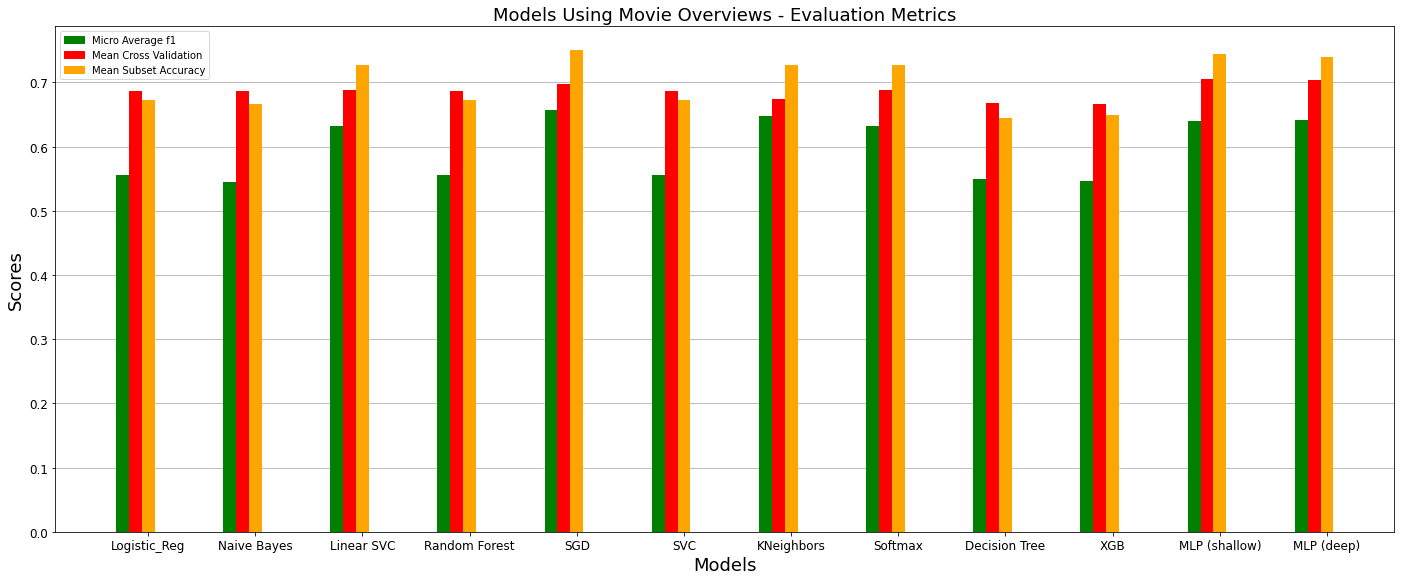

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(24,9.3))
#labels
y1= [0.5564, 0.5455, 0.6316, 0.5564, 0.6565, 0.5564, 0.6475, 0.6316, 0.5493, 0.5468, 0.6406, 0.6412] # micro_f1_overviews
y2= [0.6868, 0.6868, 0.6875, 0.6868, 0.6972, 0.6868, 0.6743, 0.6875, 0.6674, 0.6667, 0.7056, 0.7035 ] # mean_cross_val_overviews
y3= [0.6722, 0.6667, 0.7278, 0.6722, 0.7500, 0.6722, 0.7278, 0.7278, 0.6444, 0.6500, 0.7444, 0.7389] # mean_sub_acc_overviews
x= np.arange(len(y1))


bar_width= 0.12
plt.bar(x, y1, width=bar_width, color="green", zorder=2)
plt.bar(x+ bar_width, y2, width=bar_width, color="red", zorder=2)
plt.bar(x+ bar_width*2, y3, width=bar_width, color="orange", zorder=2)

plt.xticks(x+ bar_width*2, models_overviews)
plt.title("Models Using Movie Overviews - Evaluation Metrics", fontsize=18)
plt.xlabel("Models", fontsize=18)
plt.ylabel("Scores", fontsize=18)

green_patch= mpatches.Patch(color="green", label="Micro Average f1")
red_patch= mpatches.Patch(color="red", label="Mean Cross Validation")
orange_patch= mpatches.Patch(color="orange", label="Mean Subset Accuracy")
plt.legend(handles= [green_patch,red_patch, orange_patch ])

plt.grid(axis="y")

plt.show()

In [ ]:
# most promising models using only movie overviews:
# SGD/ Linear SVC/ Kneighbors/ Softmax and MLPs but with quite high computational complexity

### Voting Classifier

> Voting classifier for some of the most promising classifiers: SVC, SGD and Kneighbors

>> However, if all classifiers are trained on the same data, they are likely to make the same type of errors, so there will be many majority votes for the wrong class reducing, in this way, esnemble's accuracy. A solution would be to use predictors who can be as independent from one to another as possible

>>> Here voting classifier achieved micro average f1 score 64.62% which is smaller than that of SGD (65.65%) and KNeighbors (64.75%)

In [ ]:
from sklearn.ensemble import VotingClassifier

svc = OneVsRestClassifier(LinearSVC(), n_jobs=1)
sgd= SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
kneighb= KNeighborsClassifier()


voting_clf= VotingClassifier(
    estimators= [("lr", svc), ("sg", sgd), ("kn", kneighb)],
    voting="hard"
)

In [ ]:

model = voting_clf

model_overview = "voting_clf"


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_overview, mean_cross_val))


# plotting scores
models_overviews.append(model_overview)
mean_sub_acc_overviews.append("%.4f" % round(mean_subset_accurary, 4))
micro_f1_overviews.append("%.4f" % round(f1_result, 4))
mean_cross_val_overviews.append("%.4f" % round(mean_cross_val, 4))


happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of voting_clf model in 3-fold cross validation set are: 0.7791666666666667
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of voting_clf model in 3-fold cross validation set are: 0.7416666666666667
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.8333333333333334

Mean cross validation predictions score of voting_clf model in 3-fold cross validation set are: 0.6791666666666667
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.7333333333333333

M

## Evaluation on Test set

Taking the most promising model so far, i.e. SGDClassifier and evaluating it in the test set

* (Micro average) F1 score of this model in validation set: 65.65%
* (Micro average) F1 score of this model in test set: 58.40%

We have overfitting

In [ ]:
model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)


# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_test_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in test set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in test set is: {1}".format("SGD", f1_result))


happiness:
Subset Accuracy of happiness in test set is: 0.8666666666666667

--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in test set is: 0.7

--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in test set is: 0.8

--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in test set is: 0.8

--------------------------------------------------------------------------------------------------------------------------

fear:
Subset Accuracy of fear in test set is: 0.7

--------------------------------------------------------------------------------------------------------------------------

surprise:
Subset Accuracy of surprise in test set is: 0.6

---------------------------

### Fine-Tuning of Model

Below: 

* trying to increase the regularisation hyperparameters which might reduce overfitting
* trying to find the best parameters using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV  

param_distr= {
    "penalty": ["l1","l2"],
    "alpha": [0.0001, 0.010, 0.050, 0.1],
    "tol": [1e-3, 1e-2, 1e-1]
       
}

sgd= SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

randomized_srch= RandomizedSearchCV(estimator=sgd,
                                    param_distributions=param_distr,
                                    n_iter=20,
                                    n_jobs=-1,
                                    cv=3,
                                    random_state=42,
                                    verbose=2)

In [ ]:
model = randomized_srch

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])

happiness:
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.6s finished


sadness:
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.8s finished


anger:
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.5s finished


disgust:
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.3s finished


fear:
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.0s finished


surprise:
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.3s finished


In [ ]:
randomized_srch.best_params_

{'alpha': 0.0001, 'penalty': 'l2', 'tol': 0.1}

In [ ]:
final_model= randomized_srch.best_estimator_

In [ ]:
from sklearn.linear_model import SGDClassifier

model = final_model

# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_val_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_val[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in validation set is: {1}\n".format(emotion, subset_accuracy))
      
      cross_val_predictions= cross_val_score(model, x_train_final, y_train[emotion], cv=3).mean()
      print("Mean cross validation predictions score of {0} model in 3-fold cross validation set are: {1}".format(model_overview, cross_val_predictions))
      cross_val_predictions_total = cross_val_predictions_total + cross_val_predictions
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1

mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in validation set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in validation set is: {1}".format(model_overview, f1_result))

mean_cross_val = cross_val_predictions_total / len(emotions)
print("Mean cross validation score of 6 emotions of {0} model in 3-fold cross validation set is: {1}".format(model_overview, mean_cross_val))

happiness:
Subset Accuracy of happiness in validation set is: 0.7

Mean cross validation predictions score of voting_clf model in 3-fold cross validation set are: 0.7791666666666667
--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in validation set is: 0.7

Mean cross validation predictions score of voting_clf model in 3-fold cross validation set are: 0.7416666666666667
--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in validation set is: 0.8

Mean cross validation predictions score of voting_clf model in 3-fold cross validation set are: 0.6875
--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in validation set is: 0.7333333333333333

Mean cross validation predic

> Evaluation on test:

In [ ]:
model = final_model

# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

# in order to calculate the mean cross validation score over the 6 emotions 
cross_val_predictions_total= 0

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, y_train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_test_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of validation set (since evaluation will take place in the validation set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(y_test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in test set is :{1} ".format(model_overview, mean_subset_accurary))


y_true= y_val
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in test set is: {1}".format("SGD", f1_result))

happiness:
Subset Accuracy of happiness in test set is: 0.8666666666666667

--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in test set is: 0.7

--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in test set is: 0.7666666666666667

--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in test set is: 0.8

--------------------------------------------------------------------------------------------------------------------------

fear:
Subset Accuracy of fear in test set is: 0.7

--------------------------------------------------------------------------------------------------------------------------

surprise:
Subset Accuracy of surprise in test set is: 0.6

------------